In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df= pd.read_csv(os.path.join(dirname, filename))
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/std-infection-rates-in-america-1996-2008/STD Cases.csv


,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


In [45]:
df.shape

(42680, 11)

In [46]:
#drop state after filling Nan for population and rate 
df.drop(['index','Disease','Age'], axis= 1,inplace= True)
df.head()

,Disease Code,State,Year,Gender,Age Code,STD Cases,Population,Rate per 100K
0,274.0,Alabama,1996.0,Male,0-14,25.0,468394.0,5.34
1,274.0,Alabama,1996.0,Male,15-19,164.0,165920.0,98.84
2,274.0,Alabama,1996.0,Male,20-24,193.0,152848.0,126.27
3,274.0,Alabama,1996.0,Male,25-29,88.0,152778.0,57.60
4,274.0,Alabama,1996.0,Male,30-34,55.0,155850.0,35.29


In [47]:
df.isna().sum()

Disease Code      150
State             150
Year              150
Gender            150
Age Code          150
STD Cases         150
Population       7197
Rate per 100K    7197
dtype: int64

In [48]:
def removePopulationNaN(states: list, state_tables=[]):
    
    for state in states:
        state_df= df[df['State']==state].copy() # to avoid SetWithCopyWarning
        state_df['Population'].fillna(state_df['Population'].mean(),inplace=True)
        state_df['Rate per 100K'].fillna(state_df['Rate per 100K'].mean(),inplace=True)
#         print(state_df.tail(10))
        state_tables.append(state_df)
    final_df= pd.concat(state_tables)    
    print(len(final_df)) 
    return final_df
df2= removePopulationNaN(df.State.unique())

42530


In [49]:
df['Age Code'].unique()

array(['0-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+', '99',
       nan], dtype=object)

In [50]:
df2.isna().sum()

Disease Code     0
State            0
Year             0
Gender           0
Age Code         0
STD Cases        0
Population       0
Rate per 100K    0
dtype: int64

In [51]:
df2.Gender.unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [52]:
df2.head()

,Disease Code,State,Year,Gender,Age Code,STD Cases,Population,Rate per 100K
0,274.0,Alabama,1996.0,Male,0-14,25.0,468394.0,5.34
1,274.0,Alabama,1996.0,Male,15-19,164.0,165920.0,98.84
2,274.0,Alabama,1996.0,Male,20-24,193.0,152848.0,126.27
3,274.0,Alabama,1996.0,Male,25-29,88.0,152778.0,57.60
4,274.0,Alabama,1996.0,Male,30-34,55.0,155850.0,35.29


In [53]:
df2.describe()

,Disease Code,Year,STD Cases,Population,Rate per 100K
count,42530.000000,42530.000000,42530.000000,4.253000e+04,42530.000000
mean,283.795533,2005.240607,603.133647,4.677174e+05,328.060101
std,13.723063,5.431696,1973.091099,7.369687e+05,638.634667
min,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,274.000000,2001.000000,8.000000,1.020600e+05,9.980000
50%,280.000000,2005.000000,59.000000,2.154960e+05,117.500000
75%,280.000000,2010.000000,380.000000,5.072790e+05,355.992763
max,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


In [54]:
df3= pd.get_dummies(df2, drop_first=True)
df3.head()
# ,columns=['State','Gender','Age Code'],


,Disease Code,Year,STD Cases,Population,Rate per 100K,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,State_Wyoming,Gender_Male,Gender_Unknown,Age Code_15-19,Age Code_20-24,Age Code_25-29,Age Code_30-34,Age Code_35-39,Age Code_40+,Age Code_99
0,274.0,1996.0,25.0,468394.0,5.34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,274.0,1996.0,164.0,165920.0,98.84,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,274.0,1996.0,193.0,152848.0,126.27,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,274.0,1996.0,88.0,152778.0,57.60,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,274.0,1996.0,55.0,155850.0,35.29,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
df3.Population= df3.Population/10000
df3['Rate per 100K']= df3['Rate per 100K']/10

df3.head()

,Disease Code,Year,STD Cases,Population,Rate per 100K,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,State_Wyoming,Gender_Male,Gender_Unknown,Age Code_15-19,Age Code_20-24,Age Code_25-29,Age Code_30-34,Age Code_35-39,Age Code_40+,Age Code_99
0,274.0,1996.0,25.0,46.8394,0.534,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,274.0,1996.0,164.0,16.5920,9.884,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,274.0,1996.0,193.0,15.2848,12.627,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,274.0,1996.0,88.0,15.2778,5.760,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,274.0,1996.0,55.0,15.5850,3.529,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [56]:
X= df3.drop(['Disease Code'], axis= 'columns')
y= df3['Disease Code']
X.head()

,Year,STD Cases,Population,Rate per 100K,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_Wyoming,Gender_Male,Gender_Unknown,Age Code_15-19,Age Code_20-24,Age Code_25-29,Age Code_30-34,Age Code_35-39,Age Code_40+,Age Code_99
0,1996.0,25.0,46.8394,0.534,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1996.0,164.0,16.5920,9.884,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1996.0,193.0,15.2848,12.627,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1996.0,88.0,15.2778,5.760,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1996.0,55.0,15.5850,3.529,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

In [58]:


#scaling the model
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((29771, 63), (12759, 63))

In [59]:
y_train.value_counts()

274.0    12233
280.0    11293
310.0     6245
Name: Disease Code, dtype: int64

In [60]:
#using dimensionality reduction technique PCA on scaled data
from sklearn.decomposition import PCA
pca= PCA(n_components=45)
X_train_pca= pca.fit_transform(X_train)
X_test_pca= pca.fit_transform(X_test)

In [61]:
len(X_test)

12759

In [62]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [63]:
X_train_scaled['Population'].head()

0   -0.421307
1   -0.073575
2   -0.585837
3   -0.213419
4   -0.557924
Name: Population, dtype: float64

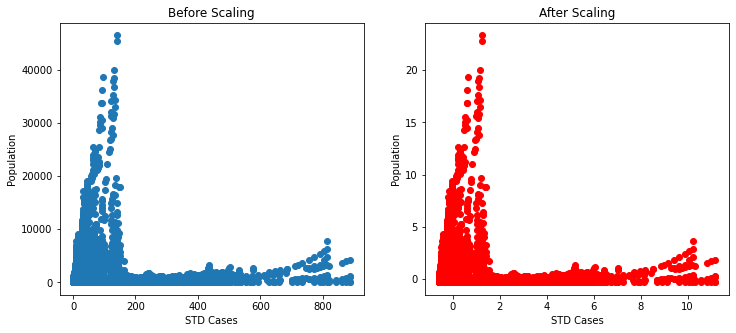

In [64]:
#plotting the results
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 5))

ax1.scatter(X_train['Population'], X_train['STD Cases'])
ax1.set_title("Before Scaling")
ax1.set_xlabel('STD Cases')
ax1.set_ylabel('Population')
ax2.scatter(X_train_scaled['Population'], X_train_scaled['STD Cases'],color='red')
ax2.set_title("After Scaling")
ax2.set_xlabel('STD Cases')
ax2.set_ylabel('Population')
plt.show()

In [65]:
#using multiclass prediction in logistic regression 
from sklearn.linear_model import LogisticRegression
modelLR= LogisticRegression(multi_class='ovr', solver='liblinear')

In [66]:
modelLR.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [67]:
modelLR.score(X_test_scaled, y_test)

0.6868093110745356

In [68]:
from sklearn.ensemble import RandomForestClassifier
modelRF= RandomForestClassifier(n_estimators=1000,  min_samples_split=8)

In [69]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=1000)

In [70]:
modelRF.score(X_test, y_test)

0.8484990986754448